# Mars Climate Database data handling
This code handles Mars Climate Database (MCD) data.

In [59]:
try:
    # Not all libraries are necessary for now
    from PIL import Image
    import shutil
    #from osgeo import gdal, osr
    from matplotlib import pyplot as plt 
    from termcolor import colored
    import cartopy.crs as ccrs
    import matplotlib.colors as colors
    import xarray as xr
    import numpy as np 
    import cartopy
    import matplotlib.gridspec as gridspec
    from glob import iglob 
    from os.path import join
    from functools import reduce
    import pandas as pd
    import itertools
    import cartopy.feature as cd
    from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
    import matplotlib.patches as patches
    import imageio
except ModuleNotFoundError:
    print('Error loading modules.')
else:
    print(colored("All libs correctly loadded.","green"))

All libs correctly loadded.


In [67]:
# Load files
ruta = "/home/programador/Downloads/"
nc_files = sorted(list(iglob(join(ruta, "**", "*.nc"), recursive = True)))
print(colored("Number of .nc files dectected:" ,"blue"), len(nc_files))
file = nc_files[2]
print(colored("Selected product" ,"blue"), file)

Number of .nc files dectected: 3
Selected product /home/programador/Downloads/dustscenario_MY34_v2-5.nc


In [71]:
# Obrir el producte: Atributs globals
with xr.open_dataset(file) as file_head:
    print(colored("Global atributes:\n" ,"blue"), file_head)

# Obrir el producte: GROUP METADATA/GRANULE_DESCRIPTION
with xr.open_dataset(file, group = "") as file_product:
    print(colored("\nMetadata:\n" ,"blue"), file_product)

Global atributes:
 <xarray.Dataset>
Dimensions:    (Time: 669, latitude: 60, longitude: 120)
Coordinates:
  * longitude  (longitude) float32 -180.0 -177.0 -174.0 ... 171.0 174.0 177.0
  * latitude   (latitude) float32 88.5 85.5 82.5 79.5 ... -82.5 -85.5 -88.5
  * Time       (Time) float32 0.5 1.5 2.5 3.5 4.5 ... 665.5 666.5 667.5 668.5
Data variables:
    SOY        (Time) int16 ...
    Ls         (Time) float32 ...
    cdodrel    (Time, latitude, longitude) float32 ...
    cdod610    (Time, latitude, longitude) float32 ...
    cdodtot    (Time, latitude, longitude) float32 ...
Attributes:
    title:          Dust scenario for MY34 produced using the combination of ...
    version:        2-5
    creation_date:  5-December-2019
    contact:        Luca Montabone (lmontabone@spacescience.org)
    citation:       Montabone, L., Spiga, A., Kass, D. M., Kleinböhl, A., For...
    reference:      The general description of the Iterative Weighted Binning...
    copyright:      Data included i

In [72]:
dust = file_product["cdodtot"]
print(colored('Names of dimensions (e.g.,("x","y","z"):','blue'), dust.dims)
print(colored('\nCoordinates: dict-like container of arrays that label each point: ','blue'), dust.coords)
print(colored('\nAttributes: dict to hold aarbitrary metadata(attributes):\n','blue'), dust.attrs)
print(colored('\nValues: a numpy.ndarray holding the array values:\n','blue'), dust.values)

Names of dimensions (e.g.,("x","y","z"): ('Time', 'latitude', 'longitude')

Coordinates: dict-like container of arrays that label each point:  Coordinates:
  * longitude  (longitude) float32 -180.0 -177.0 -174.0 ... 171.0 174.0 177.0
  * latitude   (latitude) float32 88.5 85.5 82.5 79.5 ... -82.5 -85.5 -88.5
  * Time       (Time) float32 0.5 1.5 2.5 3.5 4.5 ... 665.5 666.5 667.5 668.5

Attributes: dict to hold aarbitrary metadata(attributes):
 {'long_name': 'IR absorption CDOD (total atmospheric column)', 'units': '1', 'comment': 'See Section 6 and Appendix B of Montabone et al., 2015.'}

Values: a numpy.ndarray holding the array values:
 [[[0.07891449 0.07882353 0.07872073 ... 0.07909903 0.07905313 0.07899147]
  [0.08826671 0.08712558 0.08592136 ... 0.0909533  0.09020373 0.08930255]
  [0.10968568 0.10973305 0.10968569 ... 0.11132251 0.10968568 0.10972261]
  ...
  [0.09785161 0.09772182 0.09744614 ... 0.1000547  0.09871451 0.09834243]
  [0.0949275  0.09469544 0.09442351 ... 0.09538565 

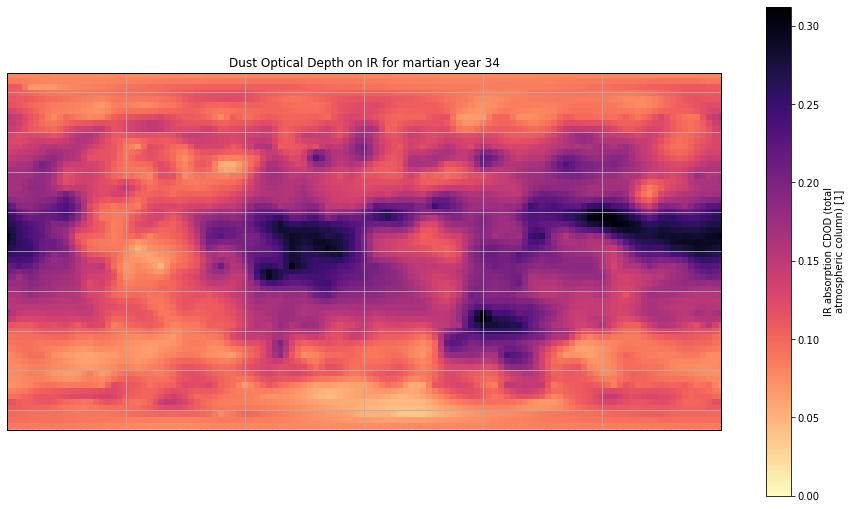

In [74]:
plt.figure(figsize = (16,9))
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=0))
dust[0].plot.pcolormesh(ax=ax,x='longitude',y='latitude',add_colorbar=True,cmap='magma_r',transform=ccrs.PlateCarree(),vmin=0)

ax.set_title("Dust Optical Depth on IR for martian year 34")
#ax.coastlines('10m')
#ax.stock_img()
ax.gridlines()
# Perspectiva global
# ax.set_global()

#plt.savefig(ruta + "ContaminacióAtmosfèrica.png", bbox_inches = "tight", dpi = 400)

plt.show()

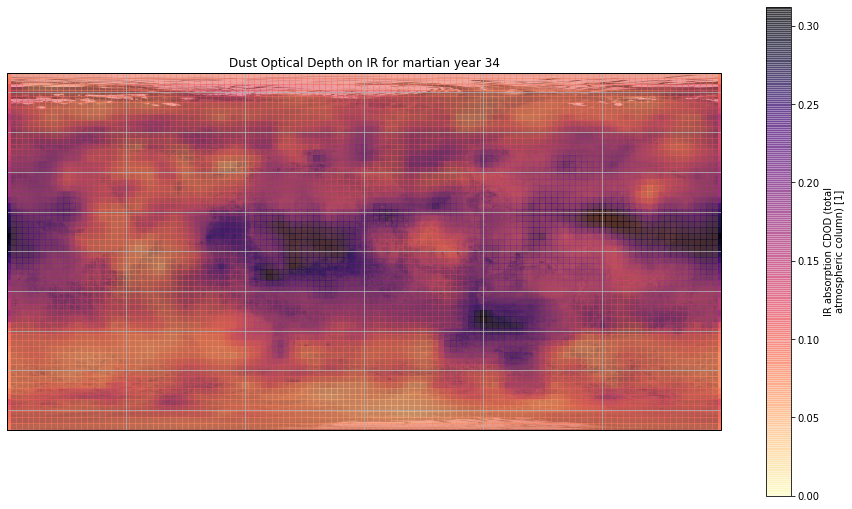

In [73]:
plt.figure(figsize = (16,9))
img = plt.imread("Mars_Viking_ClrMosaic_global_1024 _inv.png")

ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=0))
dust[0].plot.pcolormesh(ax=ax,x='longitude',y='latitude',add_colorbar=True,cmap='magma_r',transform=ccrs.PlateCarree(),vmin=0, alpha=0.5)

ax.set_title("Dust Optical Depth on IR for martian year 34")
#ax.coastlines('10m')
#ax.stock_img()
ax.gridlines()
# Perspectiva global
# ax.set_global()
ax.imshow(img, extent=[-180, 180, -90, 90])
#plt.savefig(ruta + "ContaminacióAtmosfèrica.png", bbox_inches = "tight", dpi = 400)

plt.show()

In [10]:
# Coordinates
print(dust.coords)

Coordinates:
  * longitude  (longitude) float32 -180.0 -177.0 -174.0 ... 171.0 174.0 177.0
  * latitude   (latitude) float32 88.5 85.5 82.5 79.5 ... -82.5 -85.5 -88.5
  * Time       (Time) float32 0.5 1.5 2.5 3.5 4.5 ... 665.5 666.5 667.5 668.5


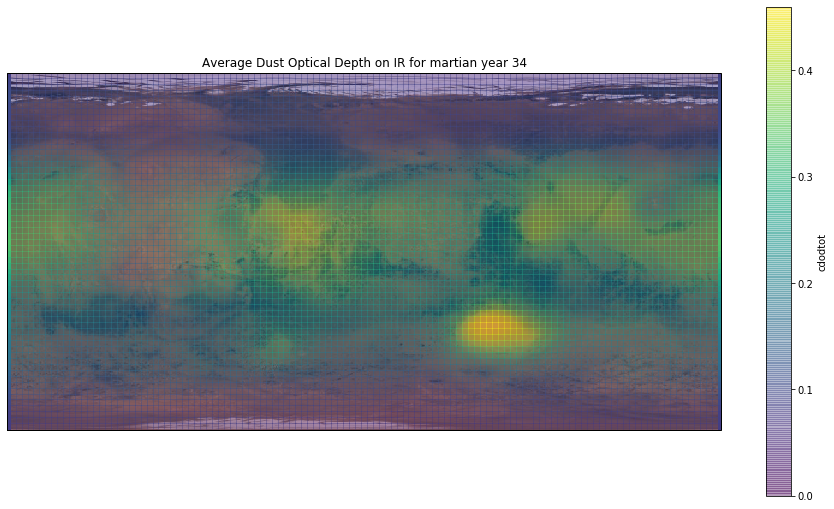

In [84]:
img = plt.imread("Mars_Viking_ClrMosaic_global_1024 _inv.png")

avg=dust[0]
for i in range(0, 669):
    avg=avg+dust[i]

avg=avg/669
plt.figure(figsize = (16,9))
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=0))
avg.plot.pcolormesh(ax=ax,x='longitude' ,y='latitude',add_colorbar=True,cmap='viridis',transform=ccrs.PlateCarree(),vmin=0, alpha = 0.4)

ax.set_title("Average Dust Optical Depth on IR for martian year 34")


#ax.coastlines('10m')
#ax.stock_img()
#ax.gridlines()
# Perspectiva global
# ax.set_global()


ax.imshow(img, extent=[-180, 180, -90, 90])

plt.savefig("/home/programador/Dust.png", bbox_inches = "tight", dpi = 400)
plt.show()

from PIL import Image
im=Image.fromarray(avg.values)
#im.save("prova1.tif")


